In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('deforestation.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
categorical_features = ['Region', 'Country']
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tile ID                           1100 non-null   object        
 1   Image ID                          1100 non-null   object        
 2   Date                              1100 non-null   datetime64[ns]
 3   Region                            1100 non-null   object        
 4   Country                           1100 non-null   object        
 5   Biome Type                        1100 non-null   object        
 6   Latitude                          1100 non-null   float64       
 7   Longitude                         1100 non-null   float64       
 8   Elevation (m)                     1100 non-null   float64       
 9   Slope (°)                         1100 non-null   float64       
 10  Rainfall (mm)                     1100 non-null 

In [5]:
print(df.head())

  Tile ID        Image ID       Date       Region Country  \
0   T0001  T0001_20240101 2024-01-01  Congo Basin     DRC   
1   T0001  T0001_20240201 2024-02-01  Congo Basin     DRC   
2   T0001  T0001_20240301 2024-03-01  Congo Basin     DRC   
3   T0001  T0001_20240401 2024-04-01  Congo Basin     DRC   
4   T0001  T0001_20240501 2024-05-01  Congo Basin     DRC   

            Biome Type  Latitude  Longitude  Elevation (m)  Slope (°)  ...  \
0  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
1  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
2  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
3  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
4  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   

   Distance to River (km)  Protected Area (1=Yes,0=No)  \
0                     6.1                            0   
1                     6.1                       

In [6]:
print(df.isnull().sum())

Tile ID                             0
Image ID                            0
Date                                0
Region                              0
Country                             0
Biome Type                          0
Latitude                            0
Longitude                           0
Elevation (m)                       0
Slope (°)                           0
Rainfall (mm)                       0
Temperature (°C)                    0
Cloud Cover (%)                     0
Fire Alerts (7d)                    0
NDVI (Vegetation Index)             0
NDMI (Moisture Index)               0
EVI (Enhanced Vegetation Index)     0
Tree Cover (%)                      0
Canopy Height (m)                   0
Distance to Road (km)               0
Distance to Settlement (km)         0
Distance to River (km)              0
Protected Area (1=Yes,0=No)         0
Logging Concession (1=Yes,0=No)     0
Population Density (per km²)        0
Forest Loss Last 3Y (%)             0
Cumulative D

In [7]:
sns.set_style("whitegrid")

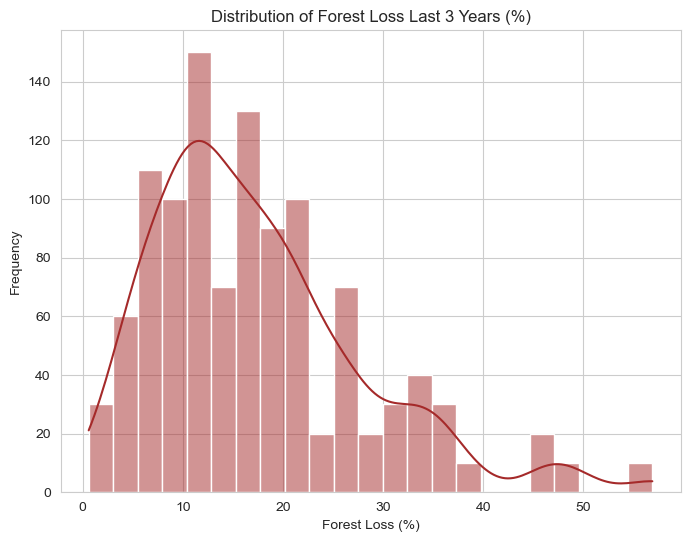

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df_processed['Forest Loss Last 3Y (%)'], kde=True, color= 'Brown')
plt.title('Distribution of Forest Loss Last 3 Years (%)')
plt.xlabel('Forest Loss (%)')
plt.ylabel('Frequency')
plt.show()

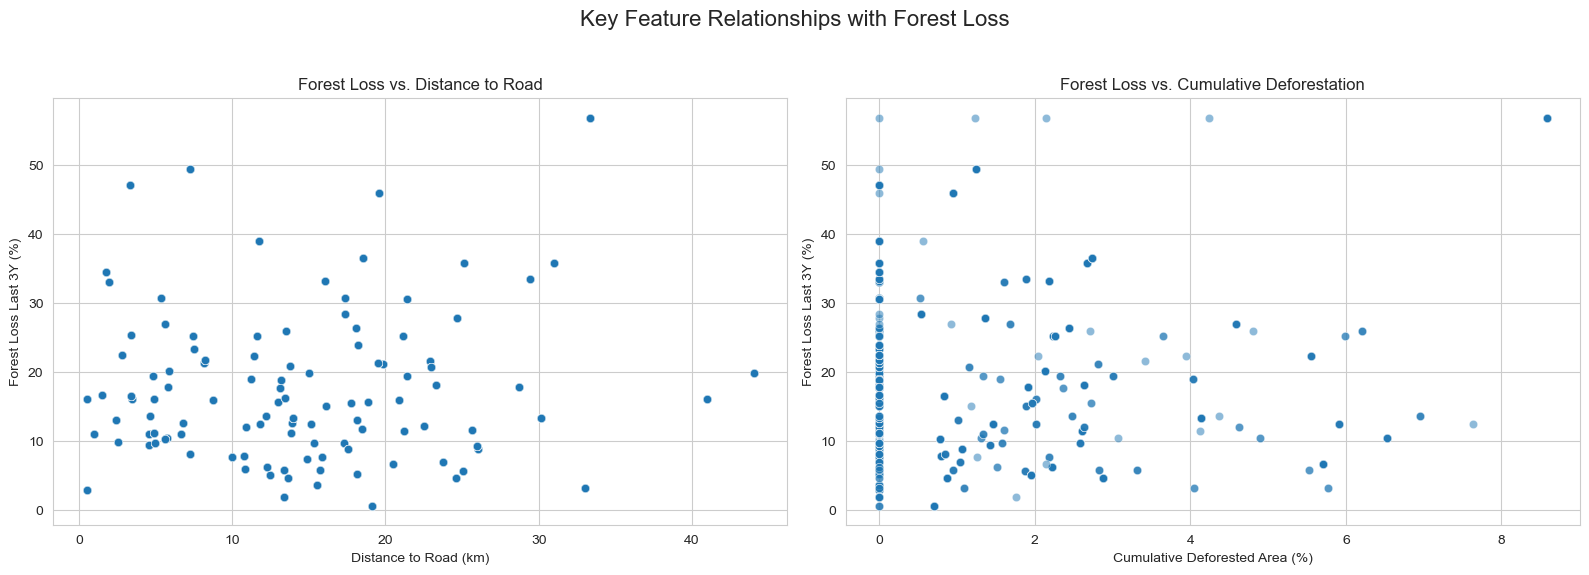

In [9]:
fig,axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Key Feature Relationships with Forest Loss',fontsize=16)
sns.scatterplot(x='Distance to Road (km)', y='Forest Loss Last 3Y (%)', data=df_processed, ax=axes[0], alpha=0.5)
axes[0].set_title('Forest Loss vs. Distance to Road')
sns.scatterplot(x='Cumulative Deforested Area (%)', y='Forest Loss Last 3Y (%)', data=df_processed, ax=axes[1], alpha=0.5)
axes[1].set_title('Forest Loss vs. Cumulative Deforestation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [10]:
train_df = df_processed[df_processed['Dataset Split'] == 'train']
test_df = df_processed[df_processed['Dataset Split'] == 'test']

In [11]:
TARGET = 'Forest Loss Last 3Y (%)'

In [12]:
features_to_drop = ['Tile ID', 'Image ID', 'Date', 'Dataset Split', 'Image File Path',
    '"Deforestation Event (Yes=1,No=0)"', 'Predicted Risk Score', 'Biome Type', TARGET
]

In [13]:
all_cols = train_df.columns
feature_cols = [col for col in all_cols if col not in features_to_drop]

In [14]:
X_train = train_df[feature_cols]
y_train = train_df[TARGET]
X_test = test_df[feature_cols]
y_test = test_df[TARGET]

In [15]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (770, 31)
Testing set shape: (220, 31)


In [16]:
reg_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [17]:
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"  (On average, the model's prediction is off by ~{mae:.2f} percentage points.)")
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"\nR-squared (R²): {r2:.4f}")
print(f"  ({r2:.1%} of the variance in forest loss is explained by the model.)")


Mean Absolute Error (MAE): 10.6505
  (On average, the model's prediction is off by ~10.65 percentage points.)

Mean Squared Error (MSE): 216.9823

R-squared (R²): -0.4403
  (-44.0% of the variance in forest loss is explained by the model.)


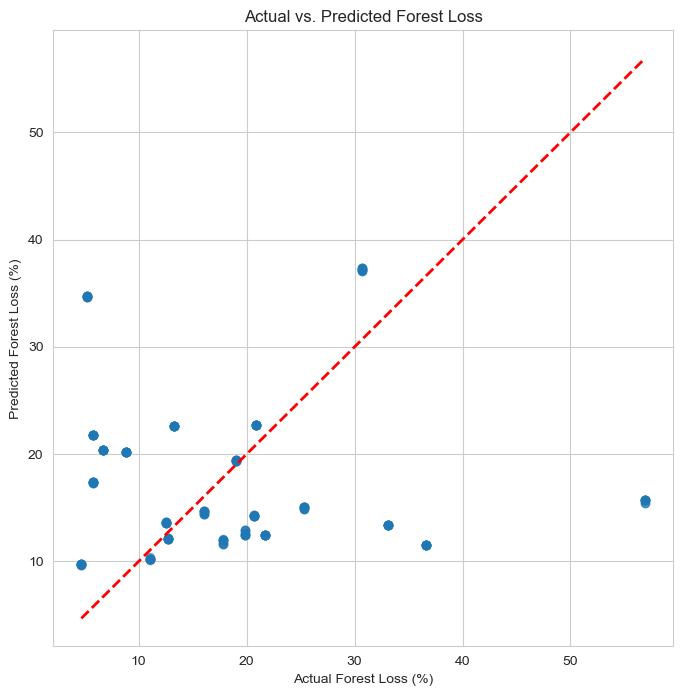

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Forest Loss (%)')
plt.ylabel('Predicted Forest Loss (%)')
plt.title('Actual vs. Predicted Forest Loss')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_18656\3916738300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='plasma')


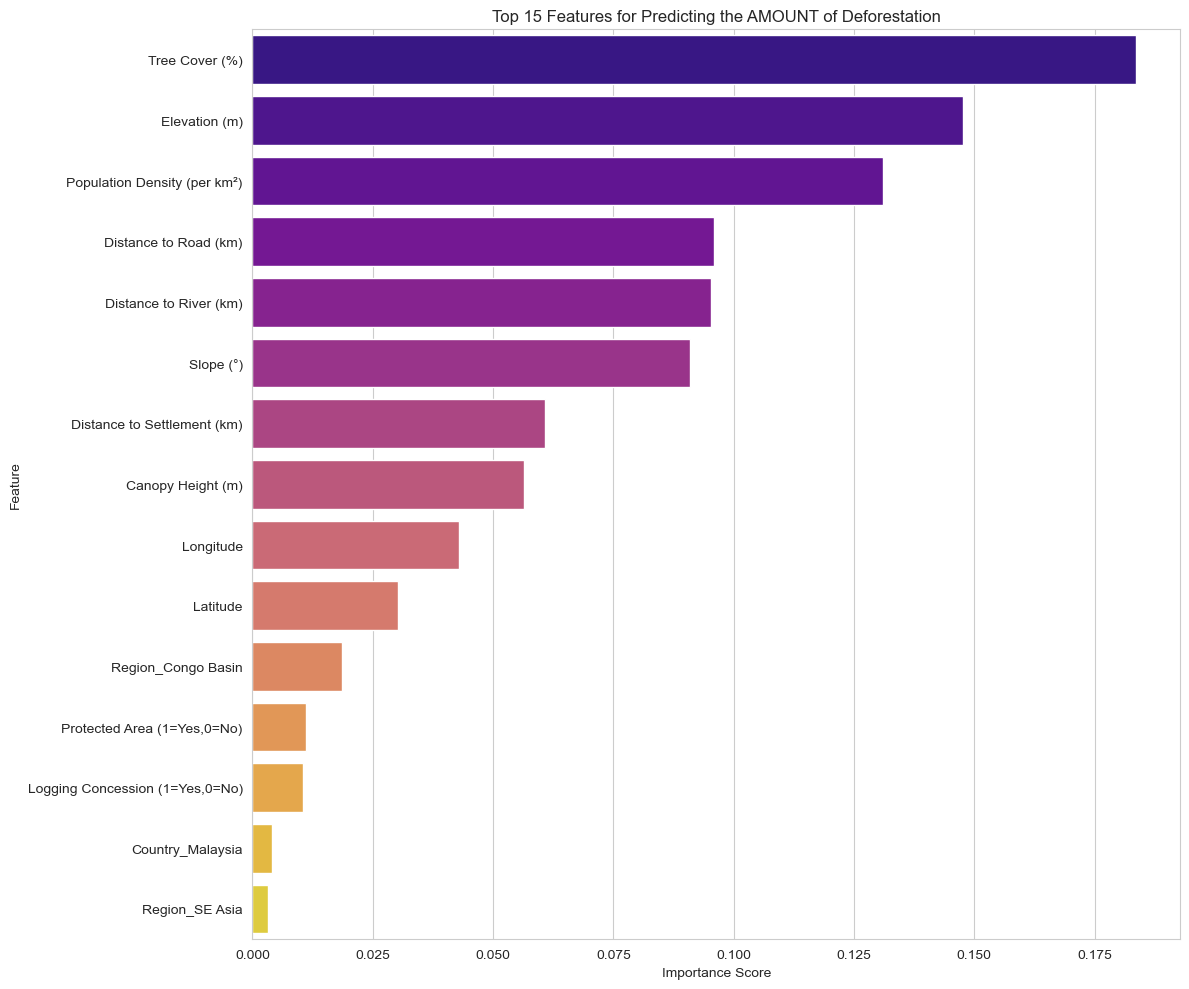

In [19]:
importances = reg_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='plasma')
plt.title('Top 15 Features for Predicting the AMOUNT of Deforestation')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()